In [1]:
import numpy as np
import pandas as pd
import struct
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
sns.set_style('darkgrid')
import sys
import os
import csv
import seaborn
from  matplotlib import pyplot

[0.05472104 0.68715851]


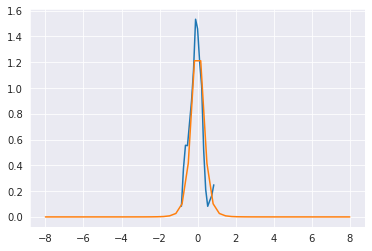

In [72]:
from scipy.optimize import curve_fit

def plot_func(function, x1, x2):
    xdata = np.linspace(x1, x2, 50)
    ydata = dipole(xdata, 0.05472104, 0.68715851)
    plt.plot(xdata, ydata)

def dipole(x, a, b):
    return a*4*b/(b**2+x**2)**3

def fit_x(data, function):
    popt, pcov = curve_fit(function, data[0], data[1])
    return popt

mu=0
w=mu//10
q=mu-w*10
T=10
R=12
data = read_file('/home/ilya/lattice/flux_tube/result/unsmeared_plaket/transversal/time_32/mu0.%d%d/electric_T=%d_R=%d' % (w, q, T, R))
print(fit_x(data, dipole))
plt.plot(data[0], data[1])
plot_func(dipole, -8, 8)

R=16


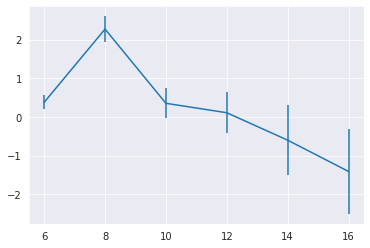

<Figure size 432x288 with 0 Axes>

In [13]:
mu=40
delta = 0
T = [6, 8, 10, 12, 14, 16]
R = [16]
for i in R:
    print('R=%d' % (i))
    T_dependence(mu, i, T, delta)

10 8


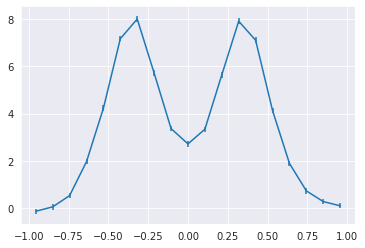

10 10


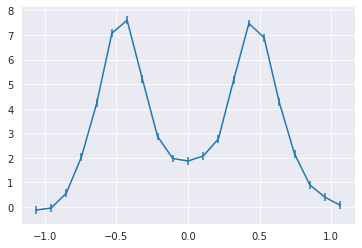

10 12


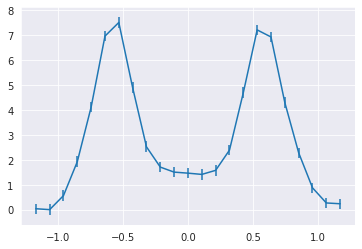

10 14


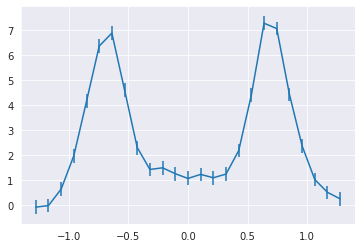

10 16


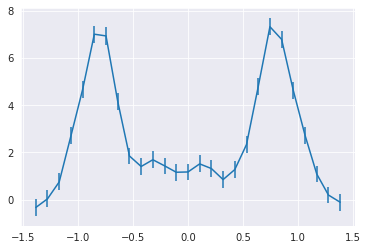

10 18


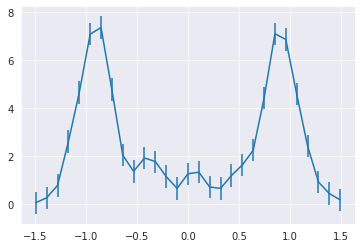

10 20


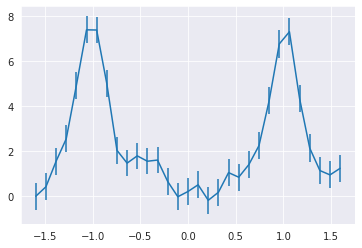

10 22


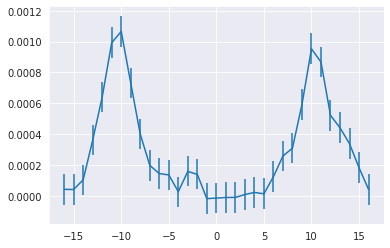

<Figure size 432x288 with 0 Axes>

In [10]:
mu=0
T=10
plaket='unsmeared_plaket'
data_plot(mu, T, 8, plaket)
data_plot(mu, T, 10, plaket)
data_plot(mu, T, 12, plaket)
data_plot(mu, T, 14, plaket)
data_plot(mu, T, 16, plaket)
data_plot(mu, T, 18, plaket)
data_plot(mu, T, 20, plaket)
data_plot(mu, T, 22, plaket)

12 8


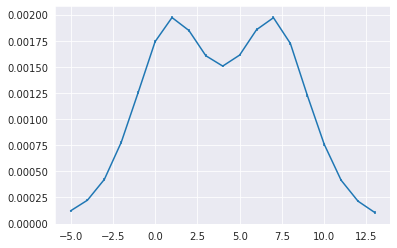

12 10


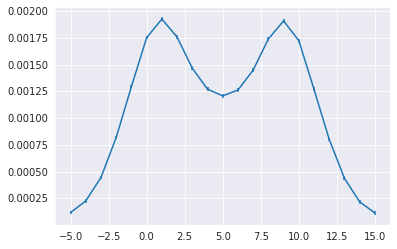

12 12


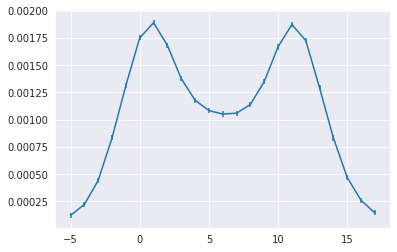

12 14


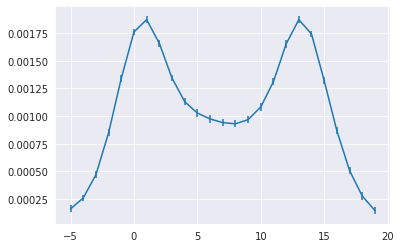

12 16


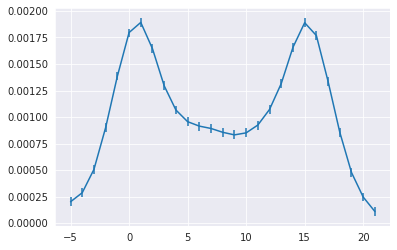

12 18


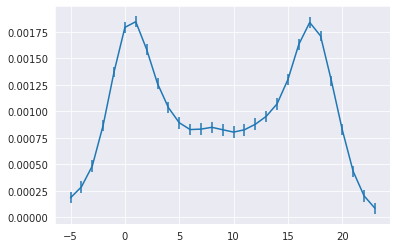

12 20


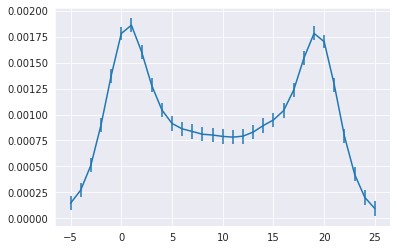

12 22


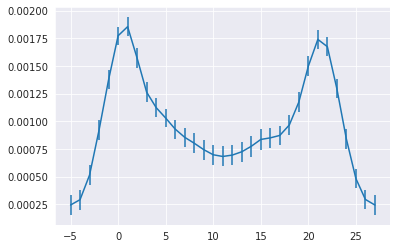

<Figure size 432x288 with 0 Axes>

In [46]:
mu=10
T=12
plaket='smeared_plaket_withhyp'
data_plot(mu, T, 8, plaket)
data_plot(mu, T, 10, plaket)
data_plot(mu, T, 12, plaket)
data_plot(mu, T, 14, plaket)
data_plot(mu, T, 16, plaket)
data_plot(mu, T, 18, plaket)
data_plot(mu, T, 20, plaket)
data_plot(mu, T, 22, plaket)

In [2]:
def plot_time_dependence_wilson(mu, monopole, lattice_size):
    df_data = pd.read_csv(f"../result/flux_tube_wilson/{monopole}/qc2dstag/{lattice_size}/flux_tube_electric_mu=0.{mu}.csv", index_col=None)

#     time_sizes = [6, 8, 10, 12, 14, 16, 18, 20]
#     space_sizes = [1, 2, 3]

#     df1 = df_data_40_5[df_data_40_5['T'].isin(time_sizes)]
#     df1 = df1[df1['r/a'].isin(space_sizes)]
    fg = seaborn.FacetGrid(data=df_data, hue='R',  aspect=1.61)
    fg.map(plt.errorbar, 'd', 'field', 'err', marker="o", fmt='', linestyle = '').add_legend()

    image_path = f'../images/flux_tube_wilson/{monopole}/qc2dstag/{lattice_size}'
    try:
        os.makedirs(image_path)
    except:
        pass

    image_path = f'{image_path}/flux_tube_wilson_mu=0p{mu}_time_dependence'
    fg.savefig(image_path)

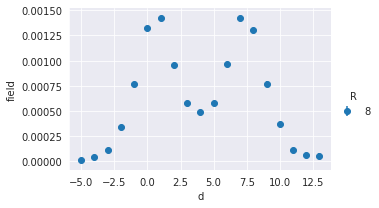

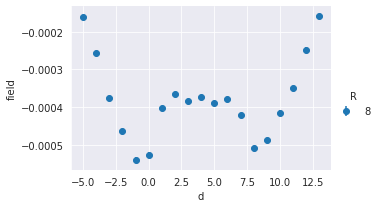

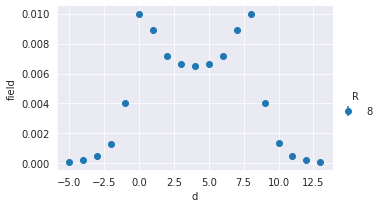

In [11]:
plot_time_dependence_wilson('00', '/', '32^4')
plot_time_dependence_wilson('00', 'monopoless', '32^4')
plot_time_dependence_wilson('00', 'monopole', '32^4')

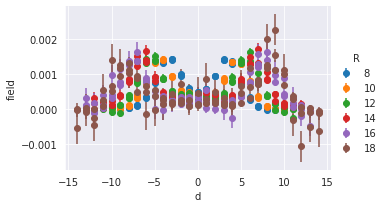

In [5]:
plot_time_dependence_wilson('05', '/', '40^4')

In [16]:
def plot_time_dependence_schwinger(mu, monopole, lattice_size):
    df_data = pd.read_csv(f"../result/flux_tube_schwinger/{monopole}/qc2dstag/{lattice_size}/flux_tube_electric_mu=0.{mu}.csv", index_col=None)

#     time_sizes = [6, 8, 10, 12, 14, 16, 18, 20]
#     space_sizes = [1, 2, 3]

#     df1 = df_data_40_5[df_data_40_5['T'].isin(time_sizes)]
#     df1 = df1[df1['r/a'].isin(space_sizes)]
    fg = seaborn.FacetGrid(data=df_data, hue='R',  aspect=1.61)
    fg.map(plt.errorbar, 'd', 'field', 'err', marker="o", fmt='', linestyle = '').add_legend()

    image_path = f'../images/flux_tube_schwinger/{monopole}/qc2dstag/{lattice_size}'
    try:
        os.makedirs(image_path)
    except:
        pass

    image_path = f'{image_path}/flux_tube_schwinger_mu=0p{mu}_time_dependence'
    fg.savefig(image_path)

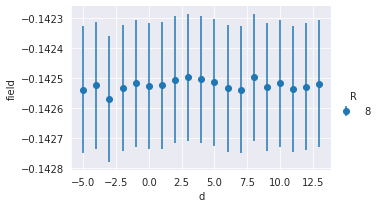

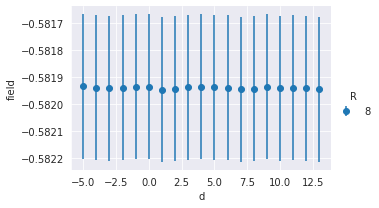

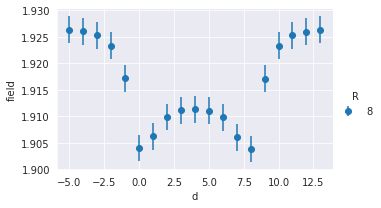

In [17]:
plot_time_dependence_schwinger('00', '/', '32^4')
plot_time_dependence_schwinger('00', 'monopoless', '32^4')
plot_time_dependence_schwinger('00', 'monopole', '32^4')